# A little bit about the Problem


Some times, specially when dealing with genetic algorithms, you may have a list with some items in it that you want to pick one out of it. the challange arises when it turns out that the elemtents of the list each has a socre and you should pick each element according to its score. What I mean is that, suppose that we have two elents in the mentioned list named 'banan' and 'orange'. banan has socre 4 and orange has score 2. so you should pick the element in the list so that the frequency of selecting banan out of list is twice the frequency of selecting orange. 

in the following artice I will propose an algorithm that can do the job for you.




# A little bit about the algorithm

the algorithm to solve this problem is way simple than thought.

the idea comes from a ribbon that is devided to segments, each have area proportional to the score of the element.

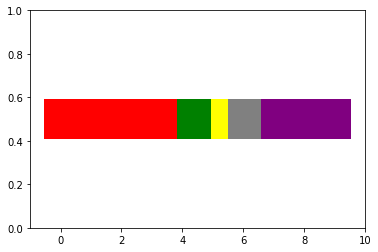

In [150]:
plt.xlim(-1,10)
plt.ylim(0,1)
plt.axhline(0.5, lw=40, xmin=1/10, xmax = 5/10, c='red')
plt.axhline(0.5, lw=40, xmin=5/10, xmax = 6/10, c='green')
plt.axhline(0.5, lw=40, xmin=6/10, xmax = 6.5/10, c='yellow')
plt.axhline(0.5, lw=40, xmin=6.5/10, xmax = 7.5/10, c='gray')
plt.axhline(0.5, lw=40, xmin=7.5/10, xmax = 9/10, c='purple')


#plt.axhline(0.5, lw=20, xmin=1)
plt.scatter([2],[3])


So to make this implementation possible, you need to take track of the accumulative amounts of the normalized scores. Consider the following example:
fruits = [a,b,c,d]

scores = [0.5, 0.1, 0.3, 0.1]

Now you should calculate the cummulative scores of each element :

scores_cumm = [0.5, 0.6, 0.9, 1]

You have almost done! Now generate a random number. the first elemnt of the above list that gets larger than the tossed number, its argument is the selected item!

# The code implementation

In [114]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
fruit_list = ['apple', 'watermelon', 'blueberry','banana', 'orange', 'mango']
fruit_prob = [0.5, 0.15, 0.05, 0.1, 0.1, 0.1]

In [84]:
cumm_prob = []
cumm_prob.append(fruit_prob[0])
for i in range(1,len(fruit_prob)):
    cumm_prob.append(fruit_prob[i] + cumm_prob[-1])
cumm_prob = np.array(cumm_prob)

In [85]:
cumm_prob

array([0.5 , 0.65, 0.7 , 0.8 , 0.9 , 1.  ])

In [86]:
select_list = []
for i in range(1000):
    rand = np.random.random()
    select_list.append(np.argmax(cumm_prob > rand))

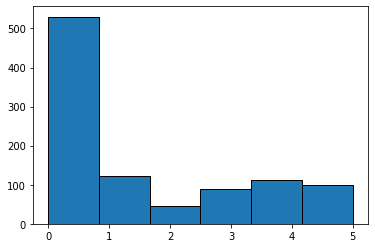

In [91]:
fig, ax = plt.subplots()
trash = ax.hist(select_list, bins=len(fruit_prob), align='mid',ec='k')
